# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)


In [86]:
train = pd.read_csv('titanic/train.csv')

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train = train[pd.notnull(train['Embarked'])]

In [89]:
y = train.Survived
train.drop('Survived', axis=1, inplace=True)


In [90]:
y_train.head()

591    1
748    0
59     0
212    0
136    1
Name: Survived, dtype: int64

In [91]:
train["isMale"] = train.Sex.replace({"male": 1, "female":0})

pasID = train["PassengerId"]
train.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [92]:
train.head()
train.info()
len(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass      889 non-null int64
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
isMale      889 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


889

In [93]:
train.info()
df = train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass      889 non-null int64
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
isMale      889 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [94]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
isMale      889 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [95]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,isMale
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1


In [96]:
X = pd.get_dummies(df, columns=['Embarked'])
# X_test = df[df.is_test==1].drop('is_test', axis=1)  Y нет толку с этого датасета мало

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,isMale,Embarked_C,Embarked_Q,Embarked_S
843,3,34.5,0,0,6.4375,1,1,0,0
318,1,31.0,0,2,164.8667,0,0,0,1
693,3,25.0,0,0,7.2250,1,1,0,0
234,2,24.0,0,0,10.5000,1,0,0,1
484,1,25.0,1,0,91.0792,1,1,0,0


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
DecisionTreeClassifier?


In [102]:
# max_depth
# min_samples_split
# min_weight_fraction_leaf

In [103]:
cs = np.arange(1, 6, 1)
cs

cs2 = np.arange(2, 5, 1)
cs2

cs3 = np.arange(0.0, 0.5, 0.1)
cs3

array([0. , 0.1, 0.2, 0.3, 0.4])

In [104]:
grid = {'max_depth': cs, "min_samples_split" : cs2, "min_weight_fraction_leaf" : cs3 }
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [105]:
%%time
gridsearch.fit(X_train, y_train)

CPU times: user 1.26 s, sys: 3.68 ms, total: 1.27 s
Wall time: 1.26 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
          

In [106]:
results = pd.DataFrame(gridsearch.cv_results_)
results[['mean_test_score','std_test_score','params']].sort_values(by='mean_test_score', ascending=False)

,mean_test_score,std_test_score,params
40,0.803094,0.029816,"{'max_depth': 3, 'min_samples_split': 4, 'min_..."
30,0.803094,0.029816,"{'max_depth': 3, 'min_samples_split': 2, 'min_..."
35,0.803094,0.029816,"{'max_depth': 3, 'min_samples_split': 3, 'min_..."
60,0.794655,0.025632,"{'max_depth': 5, 'min_samples_split': 2, 'min_..."
70,0.794655,0.024037,"{'max_depth': 5, 'min_samples_split': 4, 'min_..."
65,0.793249,0.023384,"{'max_depth': 5, 'min_samples_split': 3, 'min_..."
45,0.791842,0.026060,"{'max_depth': 4, 'min_samples_split': 2, 'min_..."
55,0.786217,0.018738,"{'max_depth': 4, 'min_samples_split': 4, 'min_..."
50,0.786217,0.018738,"{'max_depth': 4, 'min_samples_split': 3, 'min_..."
42,0.779184,0.047765,"{'max_depth': 3, 'min_samples_split': 4, 'min_..."


In [107]:
gridsearch.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}

In [108]:
# так как Y для test данных у нас нет то я принял решение забыть про test и работать только с train

([<matplotlib.axis.YTick at 0x1a17f6d390>,
 <a list of 9 Text yticklabel objects>)

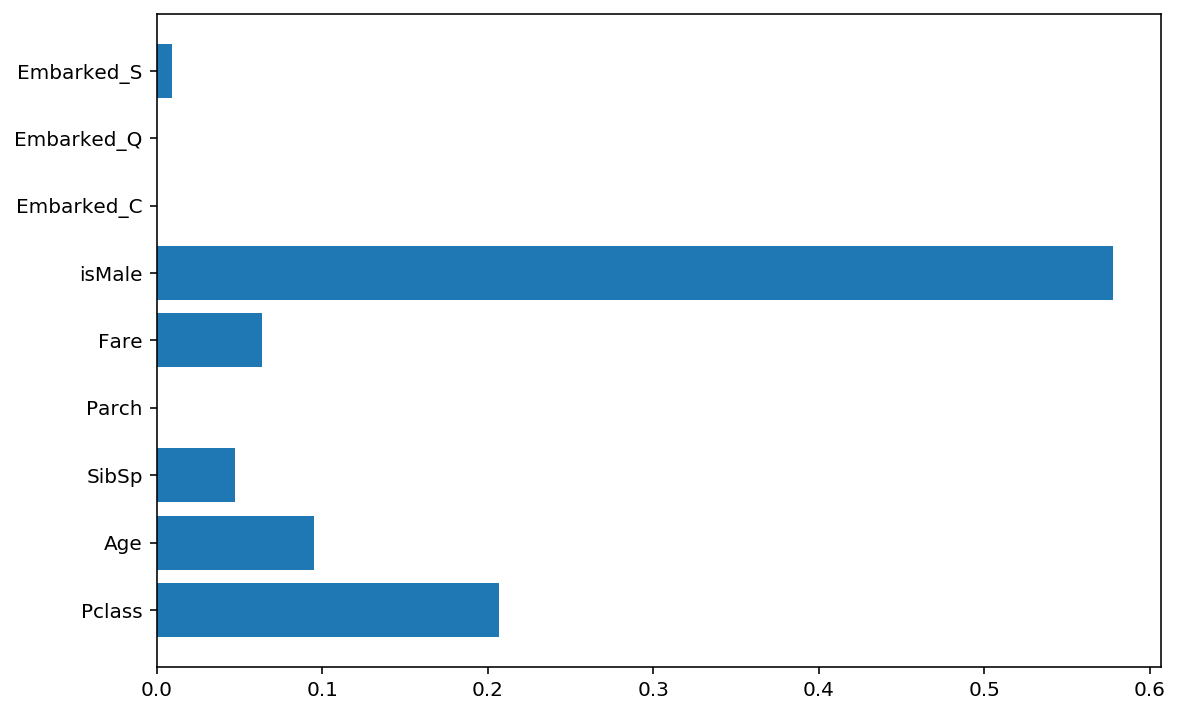

In [109]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split =2 , min_weight_fraction_leaf = 0.0)
clf.fit(X_train, y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)


In [110]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [111]:
zip( predictions, y_test )

for t in zip(predictions,y_test):
    print(t)

(0, 0)
(1, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 0)
(0, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(1, 1)
(0, 0)
(0, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(0, 0)
(1, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 1)
(1, 1)
(0, 0)
(0, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 0)
(0, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)

In [112]:
clf.score(X_test, y_test)

0.848314606741573

In [113]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [114]:
get_tree_dot_view(clf)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="X[5] <= 0.5\ngini = 0.476\nsamples = 711\nvalue = [433, 278]", fillcolor="#f6d2b8"] ;
1 [label="X[0] <= 2.5\ngini = 0.382\nsamples = 249\nvalue = [64, 185]", fillcolor="#7dbfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 2.5\ngini = 0.098\nsamples = 135\nvalue = [7, 128]", fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label="X[4] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="X[4] <= 22.0\ngini = 0.086\nsamples = 133\nvalue = [6, 127]", fillcolor="#42a2e6"] ;
2 -> 6 ;
7 [label="gini = 0.225\nsamples = 31\nvalue = [4, 27]", fillcolor="#56ace9"] ;
6 -> 7 ;
8 [label="gini = 0.038\nsamples = 102\nvalue = [2, 100]", fillcolor="#3d9fe6"] ;
6 -> 8 ;
9 [label="X[4] <= 23.35\ngini

In [58]:
# submit = pd.DataFrame(predictions, columns=sample_submission.columns[1:])
# submit['ID'] = sample_submission.ID
# submit = submit[[submit.columns[-1]]+list(submit.columns[:-1])]
# submit.to_csv('submit_homework.csv', index=False)

NameError: name 'sample_submission' is not defined

In [115]:
X_submit = X_test
y_submit = predictions

In [116]:
submit = pd.DataFrame({'PassengerId': pasID }).join(pd.DataFrame({'Survived':y_submit}))

In [117]:
submit[['PassengerId', 'Survived']].to_csv('homework_submit.csv', index=False)